In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from google.colab import drive
import io
import pandas as pd
import seaborn as sns
import math
#import sklearn as sk
from sklearn.model_selection import train_test_split
import functools

In [ ]:
data=files.upload()

Saving Pneumococcus_2009-Present_DSH_Casebase_Data.csv to Pneumococcus_2009-Present_DSH_Casebase_Data.csv


In [ ]:
df=pd.read_csv(io.StringIO(data['Pneumococcus_2009-Present_DSH_Casebase_Data.csv'].decode('utf-8')))

In [ ]:
df.drop(df[df['serotype'] == 'ND'].index, inplace = True)
df.drop(df[df['serotype'] == 'NoPCV13'].index, inplace = True)
df.drop(df[df['serotype'] == 'QNS'].index, inplace = True)

In [ ]:
df.drop(columns=['Zila','Address','UniqueID','month','AdmDate','Age (month)','Case Definition','Outcome','Discharge Date','Hospital Duration','organism'],inplace=True)

In [ ]:
df

,year,serotype
0,2009,1
2,2009,NTD
4,2009,2
6,2009,1
8,2009,12
...,...,...
784,2022,5
785,2022,1
786,2022,1
787,2022,1


In [ ]:
df = df.assign(sero_1=df['serotype']=='1')
df.sero_1 = df.sero_1.replace({True: 1, False: 0})

In [ ]:
df = df.assign(sero_2=df['serotype']=='2')
df.sero_2 = df.sero_2.replace({True: 1, False: 0})

In [ ]:
df = df.assign(sero_8=df['serotype']=='8')
df.sero_8 = df.sero_8.replace({True: 1, False: 0})

In [ ]:
df = df.assign(sero_19F=df['serotype']=='19F')
df.sero_19F = df.sero_19F.replace({True: 1, False: 0})

In [ ]:
df = df.assign(sero_23F=df['serotype']=='23F')
df.sero_23F = df.sero_23F.replace({True: 1, False: 0})

In [ ]:
df = df.assign(sero_5=df['serotype']=='5')
df.sero_5 = df.sero_5.replace({True: 1, False: 0})

In [ ]:
df = df.assign(sero_6B=df['serotype']=='6B')
df.sero_6B = df.sero_6B.replace({True: 1, False: 0})

In [ ]:
df = df.assign(sero_19A=df['serotype']=='19A')
df.sero_19A = df.sero_19A.replace({True: 1, False: 0})

In [ ]:
df = df.assign(sero_6A=df['serotype']=='6A')
df.sero_6A = df.sero_6A.replace({True: 1, False: 0})

In [ ]:
df = df.assign(sero_18C=df['serotype']=='18C')
df.sero_18C = df.sero_18C.replace({True: 1, False: 0})

In [ ]:
df = df.assign(sero_35B=df['serotype']=='35B')
df.sero_35B = df.sero_35B.replace({True: 1, False: 0})

In [ ]:
df = df.assign(sero_23B=df['serotype']=='23B')
df.sero_23B = df.sero_23B.replace({True: 1, False: 0}) 

In [ ]:
df = df.assign(sero_14=df['serotype']=='14')
df.sero_QNS = df.sero_14.replace({True: 1, False: 0})

In [ ]:
df = df.assign(sero_12=df['serotype']=='12')
df.sero_QNS = df.sero_12.replace({True: 1, False: 0})

In [ ]:
df = df.assign(sero_20=df['serotype']=='20')
df.sero_20 = df.sero_NoPCV13.replace({True: 1, False: 0})

In [ ]:
df

,year,serotype,sero_1,sero_2,sero_8,sero_19F,sero_23F,sero_23B,sero_5,sero_QNS,sero_NoPCV13,sero_6B,sero_19A,sero_6A,sero_18C,sero_ND,sero_35B
0,2009,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2009,NTD,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2009,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2009,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,2009,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,2022,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
785,2022,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
786,2022,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
787,2022,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
by_comp = df.groupby("year")
df1=by_comp.sum()
df1.reset_index()

,year,sero_1,sero_2,sero_8,sero_19F,sero_23F,sero_23B,sero_5,sero_6B,sero_19A,sero_6A,sero_18C,sero_35B
0,2009,3,1,0,0,1,0,0,0,0,0,0,0
1,2010,4,4,4,1,1,12,1,0,3,1,0,1
2,2011,2,14,1,4,6,0,1,2,2,0,0,0
3,2012,5,3,2,1,1,0,3,3,1,1,0,0
4,2013,3,0,3,7,2,0,4,5,2,2,2,1
5,2014,3,1,4,3,3,0,4,3,2,2,1,1
6,2015,4,4,2,10,4,0,4,3,3,3,5,2
7,2016,2,2,1,2,1,1,0,2,1,1,3,1
8,2017,6,9,2,1,5,0,0,2,1,1,0,2
9,2018,7,3,6,1,2,0,3,0,1,2,0,0


In [ ]:
col_list= list(df1.reset_index())
col_list.remove('year')
df1['Sum_15_serotypes'] = df1[col_list].sum(axis=1)
df1.reset_index()

,year,sero_1,sero_2,sero_8,sero_19F,sero_23F,sero_23B,sero_5,sero_6B,sero_19A,sero_6A,sero_18C,sero_35B,Sum_15_serotypes
0,2009,3,1,0,0,1,0,0,0,0,0,0,0,5
1,2010,4,4,4,1,1,12,1,0,3,1,0,1,32
2,2011,2,14,1,4,6,0,1,2,2,0,0,0,32
3,2012,5,3,2,1,1,0,3,3,1,1,0,0,20
4,2013,3,0,3,7,2,0,4,5,2,2,2,1,31
5,2014,3,1,4,3,3,0,4,3,2,2,1,1,27
6,2015,4,4,2,10,4,0,4,3,3,3,5,2,44
7,2016,2,2,1,2,1,1,0,2,1,1,3,1,17
8,2017,6,9,2,1,5,0,0,2,1,1,0,2,29
9,2018,7,3,6,1,2,0,3,0,1,2,0,0,25


In [ ]:
df1.drop(columns=['sero_1','sero_2','sero_8','sero_19F','sero_23F','sero_23B','sero_5','sero_6B','sero_19A','sero_6A','sero_18C','sero_35B'],inplace=True)

In [ ]:
df1

,Sum_15_serotypes
year,
2009,5
2010,32
2011,32
2012,20
2013,31
2014,27
2015,44
2016,17
2017,29


In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
te=pd.DataFrame(df1.reset_index())
te.to_excel("Sum_15_serotypes.xlsx")

In [ ]:
plt.rcParams['figure.figsize'] = [40,20]

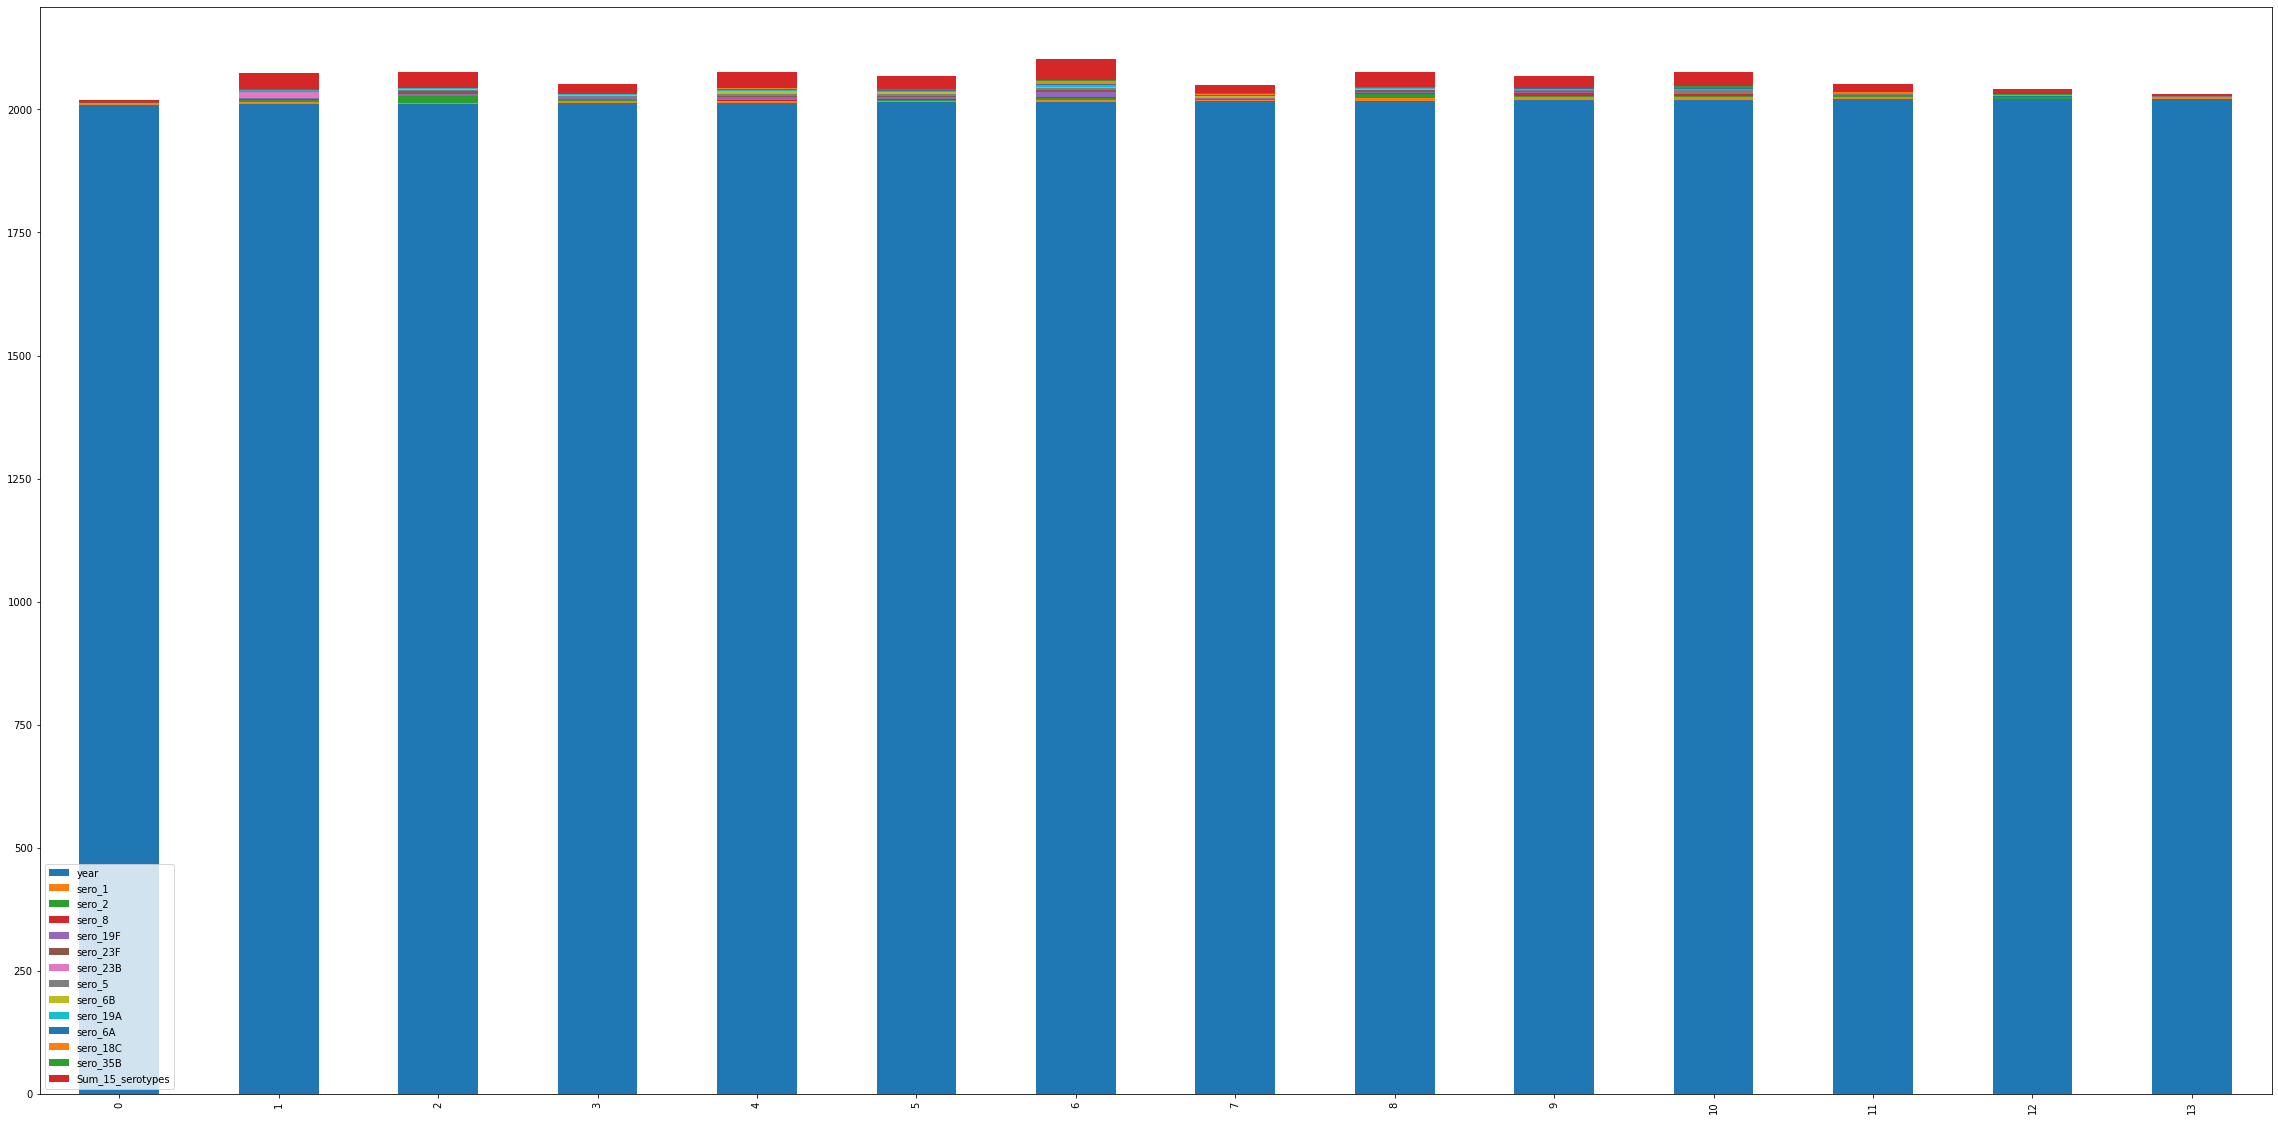

In [ ]:
df1.reset_index().plot(kind='bar', stacked=True)

In [ ]:
drive.mount('/content/gdrive')

MessageError: ignored

In [ ]:
te=pd.DataFrame(df1.reset_index())
te.to_excel("Assign_02.xlsx")

In [ ]:
data=files.upload()

In [ ]:
df2=pd.read_csv(io.StringIO(data['Assign_02.csv'].decode('utf-8')))

In [ ]:
df2

In [ ]:
df2.plot(kind='bar', stacked=True)

In [ ]:
test5 = faultdf.groupby(['Site Name', 'Abuse/NFF'])['Site Name'].count().unstack('Abuse/NFF').fillna(0)

test5.plot(kind='bar', stacked=True)